In [15]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv(r'C:\Users\DELL\Desktop\stock market data\NSE-TATAGLOBAL11.csv')
print(df)


            Date    Open    High     Low    Last   Close  \
0     08-10-2018  208.00  222.25  206.85  216.00  215.15   
1     05-10-2018  217.00  218.60  205.90  210.25  209.20   
2     04-10-2018  223.50  227.80  216.15  217.25  218.20   
3     03-10-2018  230.00  237.50  225.75  226.45  227.60   
4     01-10-2018  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  14-10-2013  160.85  161.45  157.70  159.30  159.45   
1231  11-10-2013  161.15  163.45  159.00  159.80  160.05   
1232  10-10-2013  156.00  160.80  155.85  160.30  160.15   
1233  09-10-2013  155.70  158.20  154.15  155.30  155.55   
1234  08-10-2013  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                  4642146         10062.83  
1                  3519515          7407.06  
2                  1728786          3815.79  
3                  1708590          3960.27  
4                  1534749          3486.05  
...

# create input and output dataset and train test split

In [19]:
df['Open-Close'] = (df.Open - df.Close)/df.Open
df['High-Low'] = (df.High - df.Low)/df.Low
df['percent_change'] = df['Close'].pct_change()
df['std_5'] = df['percent_change'].rolling(5).std()
df['ret_5'] = df['percent_change'].rolling(5).mean()
df.dropna(inplace=True)
X = df[['Open-Close', 'High-Low', 'std_5', 'ret_5']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
dataset_length = df.shape[0]
split = int(dataset_length * 0.75)
split


911

In [20]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(911, 4) (304, 4)
(911,) (304,)


# training the machine learning model using random forest

In [2]:
clf = RandomForestClassifier(random_state=5)
model = clf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [3]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

NameError: name 'y_test' is not defined

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)


              precision    recall  f1-score   support

          -1       0.83      0.89      0.86       152
           1       0.88      0.82      0.85       152

    accuracy                           0.86       304
   macro avg       0.86      0.86      0.86       304
weighted avg       0.86      0.86      0.86       304



In [26]:
df['sftrategy_returns'] = df.percent_change.shift(-1) * model.predict(X)


# daily returns histogram

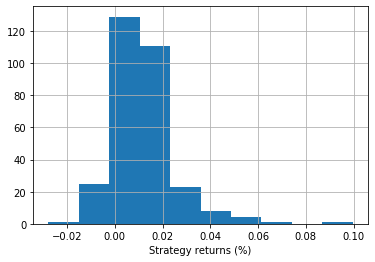

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
df.sftrategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

# strategy

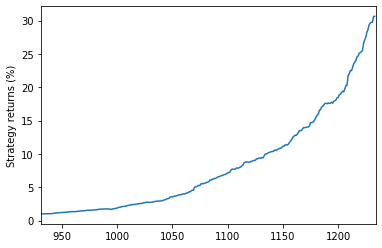

In [32]:
(df.sftrategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()